<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Random_Forests_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np #linear algebra library of Python
import pandas as pd # build on top of numpy for data analysis, data manipulation and data visualization
import matplotlib.pyplot as plt #plotting library of Python

Now let's mount Google drive so that we can upload the diabetes.csv file. You can find the code in the 'Code snippets' tab of Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


First thing that we do is take a look at the shape of the dataframe (df.shape) and take a look at first 5 lines through df.head()

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard.csv') #import file from Google Drive and create a pandas dataframe df
df.head() #shows first 5 lines including column namesdf.shape # number of rows and columns of dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df.shape # provides # rows and # columns of the dataframe df - 768 rows and 9 columns

(284807, 31)

Let's create numpy arrays, one for the features (X) and one for the label (y)



In [0]:
X=df.drop('Class', 1).values #drop 'Outcome' column but you keep the index column
y=df['Class'].values

In [0]:
from sklearn.model_selection import train_test_split #method to split training and testing data sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In KNN we need to scale the features but this is not needed when we deal with Random Forrests so we commented it out

In [0]:
#from sklearn.preprocessing import StandardScaler 
#model=StandardScaler()
#X_train=model.fit_transform(X_train)
#X_test=model.transform(X_test)

Now we are ready to use the Random Forests algorithm - only parameter that we need to select is n_estimators and the default is 100 (number of trees)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

0.9630272515590367


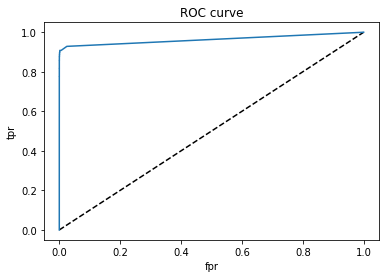

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)
print(roc_auc_score(y_test, y_pred_proba)) # ROC score

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()